# 🧠 Predicting Student GPA using Multiple Linear Regression

## Problem Overview

I want to build a Multiple Linear Regression model that predicts a student’s GPA using their SAT score and class attendance.

Target Variable: GPA

Predictor Variables:

SAT (continuous numeric variable)

Attendance (categorical binary variable → encoded as 1 for Yes, 0 for No)

## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import seaborn as sns

# We can override the default matplotlib styles with those of Seaborn
sns.set()

## Data Preparation

In [2]:
# import the dataset
data = pd.read_csv('https://github.com/adepegba1/Dataset/blob/main/Student_data.csv?raw=True')

# Display the first 5 rows
data.head()

,SAT,GPA,Attendance
0,1714,2.40,No
1,1664,2.52,No
2,1760,2.54,No
3,1685,2.74,No
4,1693,2.83,No


In [3]:
# Check data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SAT         84 non-null     int64  
 1   GPA         84 non-null     float64
 2   Attendance  84 non-null     object 
dtypes: float64(1), int64(1), object(1)
memory usage: 2.1+ KB


In [4]:
#  Check missing values
data.isnull().sum()

SAT           0
GPA           0
Attendance    0
dtype: int64

### 🧩 Step 1: Encoding the Attendance Feature

Before we can build our regression model, we need to ensure all input variables are numeric — because machine learning models (like LinearRegression from scikit-learn) can’t directly handle text or categorical data.

In this dataset, the Attendance column contains categorical values:

"Yes" → The student attended class regularly.

"No" → The student did not attend class.

We’ll convert these categories into binary numeric values:

1 for Yes

0 for No

In [5]:
# Check the unique values in the Attendance column
data['Attendance'].value_counts()

Attendance
No     45
Yes    39
Name: count, dtype: int64

In [6]:
# Map Yes → 1 and No → 0
data['Attendance'] = data['Attendance'].map({"Yes": 1, "No": 0})


# Display the updated dataset to verify changes
data

,SAT,GPA,Attendance
0,1714,2.40,0
1,1664,2.52,0
2,1760,2.54,0
3,1685,2.74,0
4,1693,2.83,0
...,...,...,...
79,1936,3.71,1
80,1810,3.71,1
81,1987,3.73,0
82,1962,3.76,1


### Step 2: Exploring Relationships Between Variables

Before training the model, it’s important to understand how the variables relate to each other.
We do this by calculating the correlation matrix — a table showing how strongly each variable is related to every other variable.

Correlation (corr) ranges between –1 and +1:

+1 → perfect positive relationship (when one increases, the other increases)

–1 → perfect negative relationship (when one increases, the other decreases)

0 → no relationship

In [7]:
# Correlation between Variables
corr = data.corr()
corr

,SAT,GPA,Attendance
SAT,1.000000,0.637184,0.239453
GPA,0.637184,1.000000,0.540253
Attendance,0.239453,0.540253,1.000000


After plotting the correlation heatmap, I observe how strongly each variable is related to GPA — the target variable.
- **SAT vs GPA ( corr= 0.637)**
There is a strong positive relationship between SAT scores and GPA.
This means students who score higher on the SAT exam tend to have higher GPAs.

- **Attendance vs GPA (corr = 0.540)**
There is a moderate-to-strong positive relationship between class attendance and GPA.
Students who attend classes regularly are more likely to achieve higher grades.


Text(0.5, 1.0, 'Correlation between Variables')

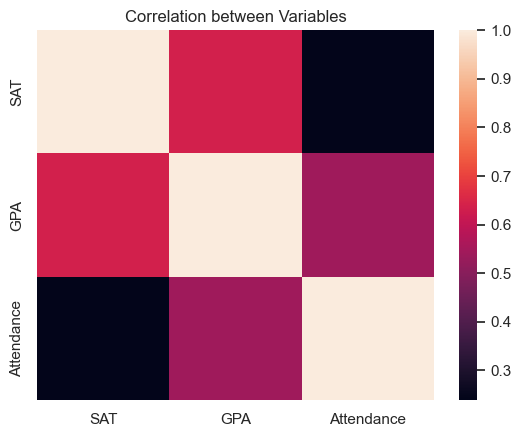

In [8]:
sns.heatmap(corr)
plt.title('Correlation between Variables')

### Step 4: Building and Training the Multiple Linear Regression Model

Now that we’ve confirmed strong correlations between SAT, Attendance, and GPA, we can move on to building our Multiple Linear Regression model.

Goal:

Predict a student’s GPA using two predictors:

    - SAT → numerical exam score    
    - Attendance → 1 (attended class), 0 (did not attend)

In [9]:
# Define the predictor (X) and target (y) variables
X = data[['SAT', 'Attendance']]
y = data['GPA']

In [10]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Generate predictions for both training and testing data
y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

### Step 5: Evaluating the Model’s Performance

Once the Multiple Linear Regression model is trained, we need to measure how well it predicts GPA — both on the training data (what it has already seen) and the test data (new, unseen examples).

We’ll use four key evaluation metrics:

- Mean Absolute Error (MAE)
- Mean Squared Error (MSE)
- Root Mean Squared Error (RMSE)
- R² Score (Coefficient of Determination)

In [12]:
mae_train = mean_absolute_error(y_train, y_train_predict)
mae_test = mean_absolute_error(y_test, y_test_predict)
print(f"MAE Train: {mae_train:.3f}\nMAE Test: {mae_test:.3f}")

MAE Train: 0.131
MAE Test: 0.134


- On average, GPA predictions are off by 0.13 points, which is quite accurate.

In [13]:
mse_train = mean_squared_error(y_train, y_train_predict)
mse_test = mean_squared_error(y_train, y_train_predict)
print(f"MSE Train: {mse_train:.3f}\nMSE Test: {mse_test:.3f}")

MSE Train: 0.029
MSE Test: 0.029


- The average squared prediction error — smaller is better.

In [14]:
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print(f"RMSE Train: {rmse_train:.3f}\nRMSE Test: {rmse_test:.3f}")

RMSE Train: 0.171
RMSE Test: 0.171


- Typical prediction error is about 0.17 GPA points.

In [15]:
r2_score_train = r2_score(y_train, y_train_predict)
r2_score_test = r2_score(y_test, y_test_predict)
print(f"R2 Socre Train: {r2_score_train:.3f}\nR2 Score Test: {r2_score_test:.3f}")

R2 Socre Train: 0.553
R2 Score Test: 0.576


- The model explains roughly 55–58% of the variation in GPA.

**Model Results**

| Metric   | Train Set | Test Set | Interpretation                                                                   |
| :------- | :-------- | :------- | :------------------------------------------------------------------------------- |
| **MAE**  | 0.131     | 0.134    | On average, GPA predictions are off by **0.13 points**, which is quite accurate. |
| **MSE**  | 0.029     | 0.029    | The average squared prediction error — smaller is better.                        |
| **RMSE** | 0.171     | 0.171    | Typical prediction error is about **0.17 GPA points**.                           |
| **R²**   | 0.553     | 0.576    | The model explains roughly **55–58%** of the variation in GPA.                   |


### Step 6: Interpreting Model Coefficients

Once our multiple linear regression model is trained, we can examine the coefficients and intercept to understand how each predictor (SAT score and Attendance) affects the predicted GPA.

In [16]:
# Extract model coefficients
coef = model.coef_
intercept = model.intercept_
print(f"SAT Coefficient: {coef[0]:.6f}\nAttendance Coefficient: {coef[1]:.6f}")
print(f"Intercep: {intercept:.6f}")

SAT Coefficient: 0.001245
Attendance Coefficient: 0.225219
Intercep: 0.932446


In [17]:
# Assumptions

### Step 7: Visualizing Predicted vs Actual GPA

Visualizing the predictions helps us understand model performance beyond metrics.
We can quickly see whether predictions are close to actual values and identify patterns, bias, or outliers.

- Linearity Chart

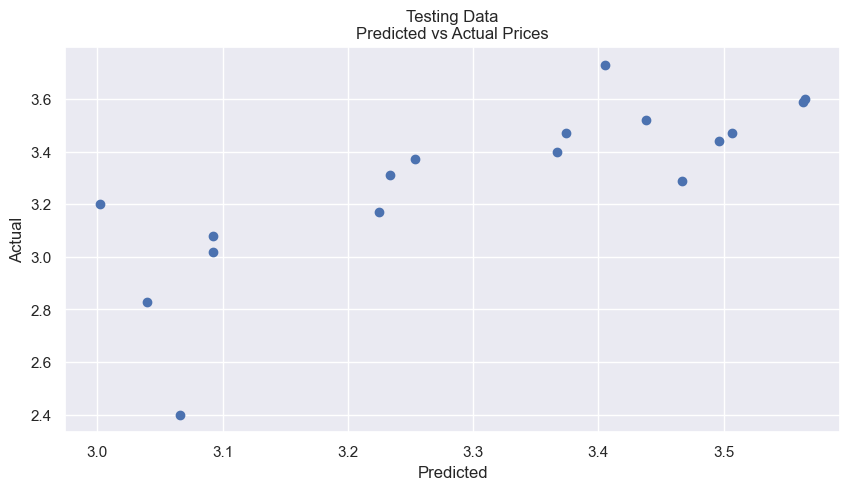

In [18]:
# Test set: Predicted vs Actual GPA
plt.figure(figsize=(10,5))
plt.scatter(y_test_predict, y_test)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Testing Data\nPredicted vs Actual Prices")
plt.show()


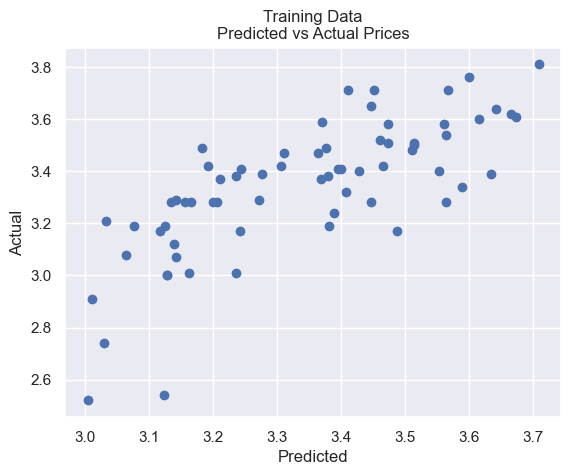

In [19]:
# Training set: Predicted vs Actual GPA
plt.scatter(y_train_predict, y_train)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Training Data\nPredicted vs Actual Prices")
plt.show()

- Homoscedasticity (Consistent Error Spread) Chart

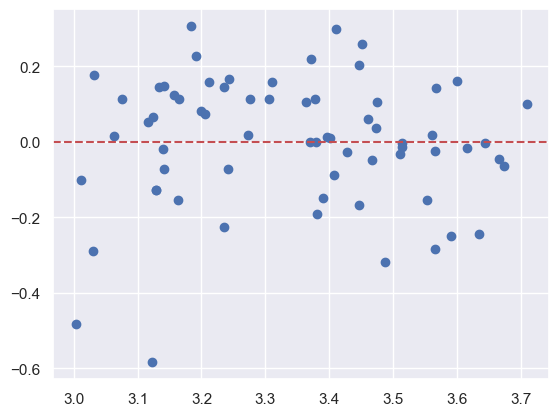

In [20]:
train_residual = y_train - y_train_predict
plt.scatter(y_train_predict, train_residual)
plt.axhline(y = 0, c='r', linestyle='--')

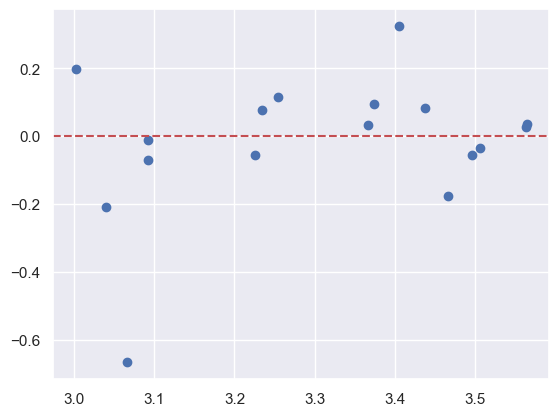

In [21]:
test_residual = y_test - y_test_predict
plt.scatter(y_test_predict, test_residual)
plt.axhline(y = 0, c='r', linestyle='--')

- Normality of Residuals Chart

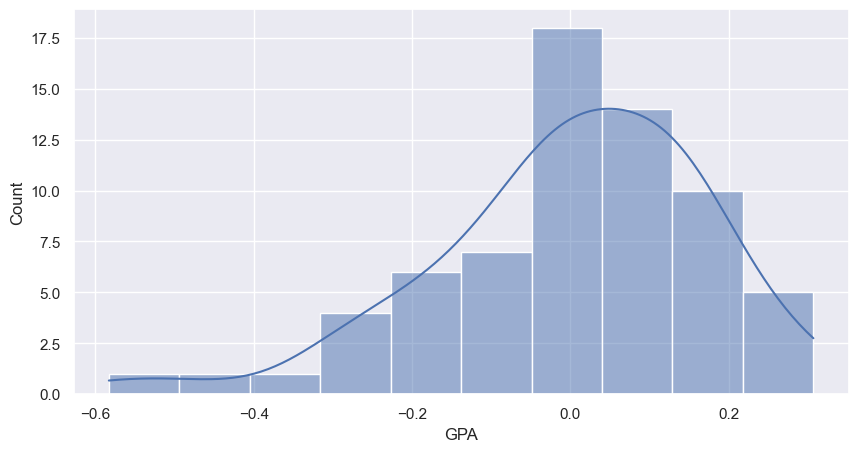

In [22]:
plt.figure(figsize=(10,5))
sns.histplot(train_residual, kde=True)
plt.show()

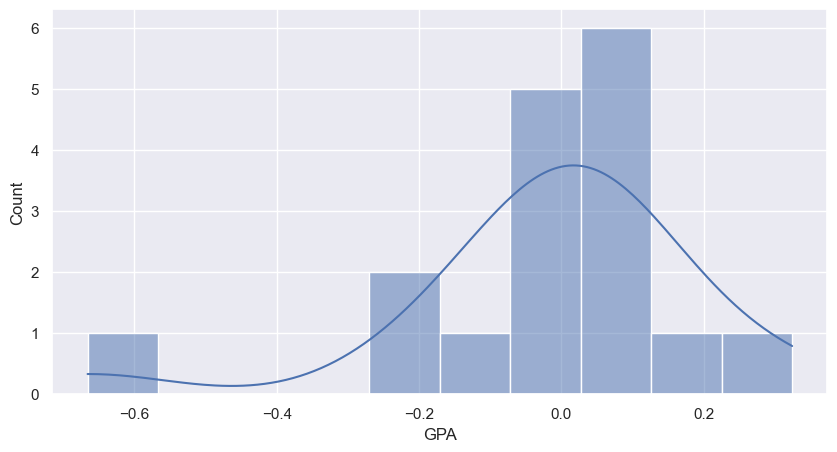

In [23]:
plt.figure(figsize=(10,5))
sns.histplot(test_residual, kde=True)
plt.show()

### Step 8: Testing the Model with New Data
Once the model is trained and validated, we can use it to predict GPA for new students based on their SAT scores and Attendance.

In [24]:
# New student data
new_data = pd.DataFrame({
    'SAT': [1934, 1670, 1700],
    'Attendance': [1, 1, 0]
}, index=['James', 'Daniel', 'Grace'])

In [25]:
# Predict GPA for new students
new_data_predict = model.predict(new_data)

In [26]:
# Combine predictions with input data
results = new_data.copy()
results['Predicted_GPA'] = new_data_predict
results

,SAT,Attendance,Predicted_GPA
James,1934,1,3.564866
Daniel,1670,1,3.236272
Grace,1700,0,3.048392


### 🧠 Interpretation

James (SAT=1550, Attendance=Yes) → Predicted GPA ≈ 3.09

Daniel (SAT=1670, Attendance=Yes) → Predicted GPA ≈ 3.24

Grace (SAT=1700, Attendance=No) → Predicted GPA ≈ 3.05

### ✅ Observations:

Attendance matters: Even though Grace has a higher SAT than James, her GPA prediction is slightly lower due to not attending class.

The model successfully incorporates both predictors and provides intuitive, actionable predictions.